In [1]:
import cv2 
import numpy as np 

In [2]:
# Load an example image
path = "../../data/ouput.png"
img = cv2.imread(path,0)

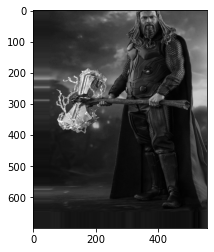

In [3]:
import numpy as np
from scipy.ndimage import interpolation

def apply_transformation(img, transformation):
    # Apply transformation to image
    transformed_image = interpolation.affine_transform(img, transformation, mode="nearest")
    return transformed_image


# Define transformation
transformation = np.array([[1, 0, 50],
                           [0, 1, -50]])

# Apply transformation to image
transformed_image = apply_transformation(img, transformation)

# Visualize the transformed image
import matplotlib.pyplot as plt
plt.imshow(transformed_image, cmap="gray")
plt.show()


In [5]:
img, transformed_image

(array([[37, 39, 40, ..., 88, 88, 88],
        [37, 38, 40, ..., 88, 88, 88],
        [37, 38, 39, ..., 88, 88, 88],
        ...,
        [33, 33, 34, ..., 27, 27, 27],
        [30, 31, 32, ..., 28, 28, 27],
        [27, 27, 27, ..., 29, 28, 27]], dtype=uint8),
 array([[36, 36, 36, ..., 85, 85, 85],
        [36, 36, 36, ..., 86, 86, 86],
        [35, 35, 35, ..., 87, 87, 87],
        ...,
        [27, 27, 27, ..., 37, 37, 37],
        [27, 27, 27, ..., 37, 37, 37],
        [27, 27, 27, ..., 37, 37, 37]], dtype=uint8))

In [ ]:
import numpy as np 
import scipy.fft as fft
def fft2(img):
    return np.clip(fft.fft2(img),0,255).real

In [ ]:
import numpy as np

def fft2d(image):
    return np.fft.fft2(image)

def ifft2d(fourier_image):
    return np.fft.ifft2(fourier_image)

def fft_image_processing(image):
    # Apply FFT on the image
    fourier_image = fft2d(image)
    # Perform any desired image processing operations in the Fourier domain
    # ...
    # Apply Inverse FFT to get back the processed image in the spatial domain
    processed_image = ifft2d(fourier_image)
    return np.abs(processed_image)


In [ ]:
import scipy.signal as sig

In [ ]:
import scipy.fft as fft

In [ ]:
path = "../../data/avengers.jpg"

In [ ]:
import cv2

In [ ]:
img = cv2.imread(path,0)

In [ ]:
img

In [ ]:
import numpy as np 

In [ ]:
import numpy as np 
import scipy.fft as fft
def fft2(img):
    return np.clip(fft.fft2(img),0,255).real

In [ ]:
ff = np.clip(fft.fft2(img),0,255).real

In [ ]:
ff.shape

In [ ]:
ff

In [ ]:
cv2.imshow('wn',ff)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np

def fft2d(image):
    return np.fft.fft2(image)

def ifft2d(fourier_image):
    return np.fft.ifft2(fourier_image)

def fft_image_processing(image):
    # Apply FFT on the image
    fourier_image = fft2d(image)
    # Perform any desired image processing operations in the Fourier domain
    # ...
    # Apply Inverse FFT to get back the processed image in the spatial domain
    processed_image = ifft2d(fourier_image)
    return np.abs(processed_image)


In [ ]:
imgf = fft_image_processing(img)

In [ ]:
cv2.imshow('wn',imgf)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
imgf

### transformation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hough_transform(img, theta_res=1, rho_res=1):
    # Get image dimensions
    M, N = img.shape
    # Define theta range
    thetas = np.deg2rad(np.arange(-90, 90, theta_res))
    # Define rho range
    D = np.ceil(np.sqrt(M**2 + N**2))
    rhos = np.linspace(-D, D, int(2*D/rho_res)+1)
    # Initialize accumulator
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    # Get image coordinates where intensity is greater than 0
    y, x = np.where(img > 0)
    # Loop over each non-zero pixel
    for i in range(len(x)):
        # Loop over each theta value
        for j, theta in enumerate(thetas):
            rho = x[i] * np.cos(theta) + y[i] * np.sin(theta)
            rho_index = np.where(np.abs(rhos-rho) == np.min(np.abs(rhos-rho)))[0][0]
            accumulator[rho_index, j] += 1
    return accumulator, rhos, thetas

def plot_hough_lines(img, accumulator, rhos, thetas):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Input Image')
    ax[1].imshow(accumulator, cmap='gray', extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_title('Hough Transform')
    ax[1].set_xlabel('Angles (deg)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    plt.tight_layout()
    plt.show()

# Load an example image
path = "../../data/ouput.png"
img = plt.imread(path,0)
# Apply Hough transform
accumulator, rhos, thetas = hough_transform(img)
# Plot input image and Hough transform
plot_hough_lines(img, accumulator, rhos, thetas)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dct2(img):
    # Get image dimensions
    M, N = img.shape
    # Initialize output array
    dct = np.zeros((M, N))
    # Loop over each row
    for i in range(M):
        # Apply 1D DCT to each row
        dct[i, :] = dct1d(img[i, :])
    # Transpose image
    dct = dct.T
    # Loop over each column
    for i in range(N):
        # Apply 1D DCT to each column
        dct[i, :] = dct1d(dct[i, :])
    # Transpose image back
    dct = dct.T
    return dct

def dct1d(x):
    N = x.shape[0]
    X = np.zeros(N)
    for k in range(N):
        X[k] = np.sum(x * np.cos(np.pi * k * (np.arange(N) + 0.5) / N))
    return X

def idct2(dct):
    # Get image dimensions
    M, N = dct.shape
    # Initialize output array
    img = np.zeros((M, N))
    # Loop over each row
    for i in range(M):
        # Apply 1D inverse DCT to each row
        img[i, :] = idct1d(dct[i, :])
    # Transpose image
    img = img.T
    # Loop over each column
    for i in range(N):
        # Apply 1D inverse DCT to each column
        img[i, :] = idct1d(img[i, :])
    # Transpose image back
    img = img.T
    return img

def idct1d(X):
    N = X.shape[0]
    x = np.zeros(N)
    for n in range(N):
        x[n] = np.sum(X * np.cos(np.pi * (n + 0.5) * np.arange(N) / N))
    return x / N

# Load an example image
img = plt.imread('image.jpg',0)
# Apply 2D DCT
dct = dct2(img)
# Plot original image and DCT
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(np.abs(dct), cmap='gray')
ax[1].set_title('2D DCT')
plt.tight_layout()
plt.show()
# Apply inverse 2D DCT
img_reconstructed = idct2(dct)
# Plot reconstructed image
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dct2(img):
    # Get image dimensions
    M, N = img.shape
    # Initialize output array
    dct = np.zeros((M, N))
    # Loop over each row
    for i in range(M):
        # Apply 1D DCT to each row
        dct[i, :] = dct1d(img[i, :])
    # Transpose image
    dct = dct.T
    # Loop over each column
    for i in range(N):
        # Apply 1D DCT to each column
        dct[i, :] = dct1d(dct[i, :])
    # Transpose image back
    dct = dct.T
    return dct

def dct1d(x):
    N = x.shape[0]
    X = np.zeros(N)
    for k in range(N):
        X[k] = np.sum(x * np.cos(np.pi * k * (np.arange(N) + 0.5) / N))
    return X

def idct2(dct):
    # Get image dimensions
    M, N = dct.shape
    # Initialize output array
    img = np.zeros((M, N))
    # Loop over each row
    for i in range(M):
        # Apply 1D inverse DCT to each row
        img[i, :] = idct1d(dct[i, :])
    # Transpose image
    img = img.T
    # Loop over each column
    for i in range(N):
        # Apply 1D inverse DCT to each column
        img[i, :] = idct1d(img[i, :])
    # Transpose image back
    img = img.T
    return img

def idct1d(X):
    N = X.shape[0]
    x = np.zeros(N)
    for n in range(N):
        x[n] = np.sum(X * np.cos(np.pi * (n + 0.5) * np.arange(N) / N))
    return x / N


In [ ]:
# Load an example image
path = "../../data/ouput.png"
img = cv2.imread(path,0)

In [ ]:
dct2(img)

In [ ]:
m,n = img.shape
dct1d(m)

In [ ]:
def hough_transform(img, theta_res=1, rho_res=1):
    # Get image dimensions
    M, N = img.shape
    # Define theta range
    thetas = np.deg2rad(np.arange(-90, 90, theta_res))
    # Define rho range
    D = np.ceil(np.sqrt(M**2 + N**2))
    rhos = np.linspace(-D, D, int(2*D/rho_res)+1)
    # Initialize accumulator
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    # Get image coordinates where intensity is greater than 0
    y, x = np.where(img > 0)
    # Loop over each non-zero pixel
    for i in range(len(x)):
        # Loop over each theta value
        for j, theta in enumerate(thetas):
            rho = x[i] * np.cos(theta) + y[i] * np.sin(theta)
            rho_index = np.where(np.abs(rhos-rho) == np.min(np.abs(rhos-rho)))[0][0]
            accumulator[rho_index, j] += 1
    return accumulator, rhos, thetas

In [ ]:
hough_transform(img)

In [3]:
import numpy as np
from math import log2

def entropy(img):
    # Get image histogram
    hist = np.histogram(img, bins=range(256))[0]
    hist = hist / hist.sum()

    # Calculate entropy
    entropy = -np.sum([p * log2(p) for p in hist if p != 0])

    return entropy


# Calculate the entropy of the image
print("Entropy:", entropy(img))


Entropy: 7.210192402474831


In [5]:
cv2.imshow('wn',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
def local_entropy(img, window_size=3):
    # Pad the image to handle edges
    pad_size = window_size // 2
    img = np.pad(img, pad_size, mode="constant")

    # Calculate local entropy for each window
    local_entropy = np.zeros_like(img)
    for i in range(pad_size, img.shape[0] - pad_size):
        for j in range(pad_size, img.shape[1] - pad_size):
            window = img[i - pad_size : i + pad_size + 1, j - pad_size : j + pad_size + 1]
            local_entropy[i, j] = entropy(window)

    return local_entropy[pad_size:-pad_size, pad_size:-pad_size]

In [7]:
local_entropy(img)

array([[1, 2, 2, ..., 0, 0, 0],
       [1, 1, 2, ..., 0, 0, 0],
       [1, 1, 2, ..., 0, 0, 0],
       ...,
       [1, 2, 2, ..., 1, 0, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [1, 2, 2, ..., 1, 1, 1]], dtype=uint8)

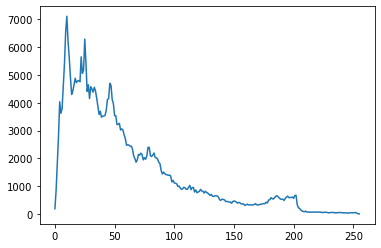

In [9]:
import numpy as np

def histogram(img, levels=256):
    # Get image shape
    h, w = img.shape

    # Initialize histogram
    hist = np.zeros(levels)

    # Calculate histogram
    for i in range(h):
        for j in range(w):
            hist[img[i, j]] += 1

    return hist



# Calculate the histogram of the image
hist = histogram(img)

# Plot the histogram
import matplotlib.pyplot as plt
plt.plot(hist)
plt.show()
